* https://jovian.ai/aakashns/03-logistic-regression

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import numpy as np

### training & test data

* If we did not download the data, we should download it for the first time. 
* In downloading, we do not differentiate training and testing data.
* root='data/' : We are going to create a folder called data, and then save the MNIST data within the folder.

In [2]:
# dataset = MNIST(root='data/', download=True) # We have to download the data if we haven't.
dataset = MNIST(root='data/', download=False)
print(dataset)
print(len(dataset)) # number of image data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
60000


In [3]:
test_dataset = MNIST(root='data/', train=False) # contained inside the already-downloaded "dataset".
print(test_dataset)
print(len(test_dataset))

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
10000


* The 1st image of the training data
* It says 28-by-28 pixel. label=5

In [4]:
print(dataset[0][1]) # label
dataset[0][0] # image file of 1-28-by-28

5


### display an image
* matplotlib.pyplot is needed in "nicely" visualizing it.

Label: 5


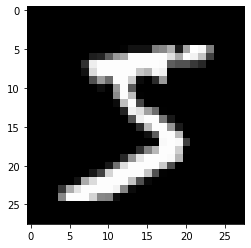

In [5]:
import matplotlib.pyplot as plt
image, label = dataset[0]
plt.imshow(image,cmap='gray') # cmap='gray' : black-and-white setting.
print('Label:', label)

* ToTensor() : transform an image to a tensor object.
* Each of our tensor object (which was originally an image) has 1-28-28 dimension. For the 1st digit, 1 means one color setting, and 3 means RGB setting.

In [6]:
import torchvision.transforms as transforms
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor()) # Our training data now contains a tensor instead of an image.
img_tensor, label = dataset[0] # Each element of the dataset has imag_tensor and a label.
print(img_tensor.shape, label)
print(img_tensor.dtype) # we may change it by adjusting the default dtype before calling the image file.

torch.Size([1, 28, 28]) 5
torch.float32


* 0=black / 1=white

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


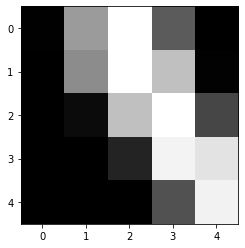

In [7]:
print(img_tensor[0,10:15,10:15])
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

### split the training dataset into training & validation dataset

* Before actually using the test data, we pick the best model by adjusting hyperparameters etc.
* When splitting, we should randomly split it, because the order (indices) of the observations may have some pattern when it was first made, for instance, ordered by size.
* For train_loader, we shuffle=True, since we want to randomly select batches for each step of SGD. On the other hand, we shuffe=False in the val_loader, because we do not need randomness here.
* Even for shuffle=True, we get multiple batches, but it is not random.
* len $\neq$ tensor.numel(): len() of an array (or tensor) is the number of the biggest-bracketed subtensors.
* If we want to analyze just a single batch, use for loop and break immediately.
* random_split() can split the data to even three or more parts when lengths=[a1,a2,a3] has more than two digits.

In [8]:
from torch.utils.data import random_split
torch.manual_seed(0)
train_ds, val_ds = random_split(dataset, [50000, 10000]) # How to be splitted depends on the seed.
len(train_ds), len(val_ds)

(50000, 10000)

In [9]:
a = [xb for xb, yb in train_ds]
len(a), a[0].shape

(50000, torch.Size([1, 28, 28]))

In [10]:
from torch.utils.data import DataLoader
batch_size=128 # Each batch contains 128 image objects (tensors).
train_loader = DataLoader(train_ds, batch_size, shuffle=True) # shuffle=True : ensures different batch for each epoch
val_loader = DataLoader(val_ds, batch_size) # shuffle=False is default. DataLoader creates a random generator.

### predicting with a randomly generated model
* First we are fitting this with a linear model: nn.Linear(number of input variables, number of output variables).

In [11]:
import torch.nn as nn
input_size = 28 * 28
num_classes = 10
model =  nn.Linear(input_size, num_classes) # randomly initialized a model with input = 1-by-784 matrix, not 1-28-28 tensor.

In [18]:
model.weight
model.bias
model.__dict__

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([[ 0.0213, -0.0300, -0.0341,  ...,  0.0103,  0.0106, -0.0244],
                       [ 0.0259,  0.0142, -0.0166,  ...,  0.0166, -0.0323,  0.0258],
                       [ 0.0295, -0.0161,  0.0326,  ..., -0.0073,  0.0200,  0.0111],
                       ...,
                       [-0.0228,  0.0257, -0.0325,  ...,  0.0221, -0.0112,  0.0060],
                       [ 0.0251,  0.0324,  0.0299,  ..., -0.0235,  0.0252,  0.0309],
                       [ 0.0282,  0.0304, -0.0162,  ...,  0.0219, -0.0098,  0.0286]],
                      requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([ 0.0356,  0.0348,  0.0209, -0.0119, -0.0128, -0.0210, -0.0208, -0.0309,
                       -0.0295, -0.0007], requires_grad=True))]),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_is_full_ba

In [12]:
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0213, -0.0300, -0.0341,  ...,  0.0103,  0.0106, -0.0244],
        [ 0.0259,  0.0142, -0.0166,  ...,  0.0166, -0.0323,  0.0258],
        [ 0.0295, -0.0161,  0.0326,  ..., -0.0073,  0.0200,  0.0111],
        ...,
        [-0.0228,  0.0257, -0.0325,  ...,  0.0221, -0.0112,  0.0060],
        [ 0.0251,  0.0324,  0.0299,  ..., -0.0235,  0.0252,  0.0309],
        [ 0.0282,  0.0304, -0.0162,  ...,  0.0219, -0.0098,  0.0286]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0356,  0.0348,  0.0209, -0.0119, -0.0128, -0.0210, -0.0208, -0.0309,
        -0.0295, -0.0007], requires_grad=True)


* Before predicting by model(), we should match the size of the input. It should be 784-vector instead of 1-28-28 tensor. Otherwise it returns an error as following.

In [13]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
#    outputs = model(images) # This gives us an error, because the input of the model should be 784, not 1-28-28.
    outputs = model(images.reshape(-1,784)) # Now it has the correct size: 128-by-784.
#    print(outputs)
    print(outputs.shape)
    break

tensor([2, 2, 8, 7, 1, 7, 0, 1, 7, 7, 0, 6, 8, 3, 9, 1, 7, 2, 8, 7, 5, 9, 7, 2,
        5, 1, 6, 0, 9, 0, 2, 2, 0, 4, 4, 7, 8, 3, 1, 6, 5, 4, 1, 6, 8, 0, 4, 0,
        3, 2, 8, 5, 0, 1, 7, 2, 4, 3, 8, 8, 6, 6, 6, 3, 7, 4, 8, 6, 8, 3, 5, 3,
        0, 4, 6, 6, 2, 5, 9, 6, 4, 2, 2, 9, 7, 4, 1, 0, 2, 5, 7, 5, 9, 7, 8, 2,
        7, 6, 6, 9, 1, 6, 0, 5, 3, 7, 9, 1, 0, 8, 1, 6, 8, 5, 3, 1, 3, 1, 8, 5,
        9, 8, 1, 7, 1, 2, 7, 1])
torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


* __Memorize the the whole box beneath!__
* It is widely spread to define a class that inherits nn.Module, and define a forward(self, X_input) inside the class.
* ```def forward(self, xb)```: extends the model into a function that takes the input data (xb).
* We have to unsqueeze a former-tensor xb into a $N\times p$ matrix. In this case, it is $1\times p$ matrix, since there is only a single observation.
* As the output of ```nn.Linear(input_size, num_classes)```, we can make a prediction function that takes input matrices. xb under ```def forward``` is just that. That is why we can put xb (reshaped) as the input of self.linear().
* Through this, we make model = MnistModel() as a function that takes a 4-way array (N-1-28-28) as input and outputs N-by-K (K=10) matrix.
* https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py 

* Although we are defining ```forward```, we cannot change the name "forward" to a different name, say "forwarda". We may define its functionalities inside, but the name itself should be maintained.
* Just like ```.backward()``` means computing gradients, ```forward``` means computing the output values for the given input tensors.
* We may ask "Exactly which functionalities do we inherit from nn.Module?" But the conventional answer is, "We just use it as a template to characterizing the layers."

In [20]:
class MnistModel(nn.Module):
    def __init__(self): # First, we inherit the function nn.Linear.
        super().__init__() # We __init__ nn.Module instead.
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb): # Second, we extend this to a function that takes an input xb. Now the class becomes a function of xb.
        xb = xb.reshape(-1,784) # 1 by 784 matrix -> may serve as an input. cannot be 784-lengthed vector.
        out = self.linear(xb) # Only after this extension, can we apply nn.Linear.
        return out

* model.linear is the output of nn.Linear.
* Thus we can pick out its weight with model.linear.weight.

In [21]:
model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0136,  0.0135,  0.0049,  ...,  0.0291, -0.0221, -0.0172],
         [-0.0273, -0.0186, -0.0005,  ..., -0.0242,  0.0342,  0.0215],
         [ 0.0157,  0.0297, -0.0084,  ...,  0.0235,  0.0159,  0.0078],
         ...,
         [ 0.0316, -0.0068, -0.0335,  ...,  0.0208,  0.0104, -0.0273],
         [ 0.0224,  0.0355, -0.0006,  ...,  0.0254, -0.0355,  0.0121],
         [-0.0128,  0.0136, -0.0291,  ...,  0.0190,  0.0319, -0.0229]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0315,  0.0297,  0.0126, -0.0310, -0.0331,  0.0213,  0.0122,  0.0193,
          0.0270, -0.0079], requires_grad=True)]

In [22]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('input shape :', images.shape)
print('outputs.shape :', outputs.shape)
print('sample outputs : \n', outputs[:2].data) # print only 2 of them out of 128 pictures in one batch.

torch.Size([128, 1, 28, 28])
input shape : torch.Size([128, 1, 28, 28])
outputs.shape : torch.Size([128, 10])
sample outputs : 
 tensor([[-0.3474,  0.2321, -0.1543, -0.0855, -0.1076, -0.1940, -0.1600,  0.1201,
         -0.4006,  0.1249],
        [-0.3997, -0.0522,  0.1505,  0.0557, -0.1361, -0.1593,  0.0436,  0.1200,
         -0.1479,  0.2464]])


In [ ]:
import torch.nn.functional as F

In [ ]:
import torch.nn.functional as F
probs = F.softmax(outputs, dim=1) # make each as a vector (array of dim=1).
print("sample probabilities:\n", probs[:2].data) # .data : without gradients
print("sum:", torch.sum(probs[0]).item()) # nearly 1.

In [ ]:
max_probs, preds = torch.max(probs, dim=1)
# print(max_probs)
print(preds)
labels # Prediction does not match well with the randomly generated model.

### accuracy with cross-entropy

In [ ]:
print(outputs[:2])
print(torch.sum(preds==labels).item() / len(preds)) 
len(outputs[0])

In [ ]:
def accuracy(l1, l2):
    return torch.sum(l1==l2).item() / len(l1) # .item() : returns the value of the tensor.

accuracy(preds, labels)

* cross entropy: the bigger the probability of the correct state is, the small its value becomes. (Wrong states does not count since its $y_j=0$ for all $j$ that is not the correct index.)
* Cross entropy is better than the above accuracy, since it is differentiable.
* We will use cross entropy for loss function, but will report accuracy at the end.
* cross_entropy(input1=$N\times K$-matrix, input2=$N$-lengthed vector): input1 is not limited in values, but input2 must have 0,$\cdots$,K-1.

* With $p$ and $q$ being the true and estimated (with softmax function) probability respectively, and $\chi$ being the support, cross entropy is defined as $H(p,q)=E_p(\log q(X)) = -\sum_{x\in \chi}p(x)\log q(x)$, and is estimated by $\hat{H}(p,q) = \frac{1}{N} \sum_{i=1}^{N} \log q(x_i)$ (mean version), or $\hat{H}(p,q) =\sum_{i=1}^{N} \log q(x_i)$ (sum version). We follow the mean version as default.
* Note that $q$ is estimated by softmaxing the input matrix by rows, and then $q(x_i)$ is estimated only for the realized value $x_i$.
* https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
# calculate cross entropy with F.cross_entropy.
obj1 = torch.rand(10).reshape(-1,2)
obj2 = torch.tensor([0,1,1,0,0])
F.cross_entropy(obj1, obj2)

# compute manually
logq = torch.log(torch.exp(obj1) / torch.sum(torch.exp(obj1), axis=1).reshape(-1,1))
np.mean([-logq[i,obj2[i]].item() for i in range(5)])

# verification
F.cross_entropy(obj1, obj2)-np.mean([-logq[i,obj2[i]].item() for i in range(5)]) # verify that they are the same.

In [ ]:
import torch.nn.functional as F
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

### optimizer
* specify model and learning rate.

In [ ]:
learning_rate = 0.001
optimzer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training the model

* loss_batch() : update the parameters once, and get the result of that single iteration
* loss_batch() takes a single batch of data as the input, while evaluate takes the whole validation dataset.

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None): # take a single batch xb, yb as input.
    # calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb) # .item : value of the loss
    
    if opt is not None:
        loss.backward() # compute gradients
        opt.step() # update parameters
        opt.zero_grad() # reset gradients
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb) # compute the metric
    
    return loss.item(), len(xb), metric_result

* zip(iterator1, iterator2, iterator3, ...) : pair the first elements together, second elements together, and so on.
* zip(\*list) where list contains multiple objects.
* It sorts the same objects together.
* https://stackoverflow.com/questions/29139350/difference-between-ziplist-and-ziplist/29139418

In [ ]:
# # example of zip
# a = ("John", "Charles", "Mike")
# b = ("Jenny", "Christy", "Monica")
# x = zip(a, b)
# print(tuple(x))

In [1]:
p = ([1,2,3], [4,5,6])
# p = [(1,2,3), (4,5,6)] # same result
d = zip(*p) # * : unpacks the list. remove the outer bracket. 
print(list(d)) # -> therefore this line is equivalent to zip([1,2,3], [4,5,6]) 
a,b,c = zip(*p)
print(a); print(b); print(c)

[(1, 4), (2, 5), (3, 6)]
(1, 4)
(2, 5)
(3, 6)


* results = [(a1,b1,c1), (a2,b2,c2), (a3,b3,c3), $\cdots$]
* zip(\*results) gives us 3 objects : [a1,a2,a3. $\cdots$], [b1,b2,b3,$\cdots$], [c1,c2,c3,$\cdots$]
* np.multiply(tuple1, tuple2) : tuple1 and tuple2 should have the same size. output is also the same, but in np.array.
* np.multiply((1,2,3), (1,2,3)  ) = array([1,4,9])

In [ ]:
results = [loss_batch(model, loss_fn, xb, yb, metric=accuracy) for xb,yb in val_loader]
results
a,b,c = zip(*results)
print(a[:10], b[:10], c[:10])
np.multiply(a,b)

* evaluate() : assess the performance of the model on validation dataset. Since it takes the whole validation dataset as the input, unlike loss_batch that only takes a single batch, it focuses on "average performance".
* Although it contains loss_batch() inside, it has opt=None, so it does not update any parameter. It only measures the accuracy when applied to validation data.
* In fact, we do not need torch.no_grad(), since we are not taking gradient descent.
* In every epoch, we are updating the parameters 391 times (=number of batches of the training dataset).

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric = None):
    with torch.no_grad(): # gradient descent is done only for training set, and validation set is just for reporting purpose.
        # pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb,yb in valid_dl]
        
        # separate losses, counts, metrics
        losses, nums, metrics = zip(*results) 
        # total size of the dataset
        total = np.sum(nums) # total number of obs in the dataset = 10000
        # average loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total 
        avg_metric = None
        if metric is not None:
            # average of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total # weighted sum of accuracy.
    return avg_loss, total, avg_metric # focuses on "average" of all batches (or whole validation dataset).

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # -, : We don't care about the maximum value, but we save its label as pred.s
    return torch.sum(preds==labels).item() / len(preds)

In [ ]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric =  accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

* fit() : fitting procedure. Inside it, we update it with loss_batch() and assess its peformance on validation set with evaluate().
* For each batch of the training dataset, we update once.
* function.\_\_name\_\_ : the name of the function
* loss,\_,\_ = loss_batch(model, loss_fn, xb, yb, opt) : Only save the loss value.

In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    history = []
    for epoch in range(epochs):
        # training
        for xb,yb in train_dl:
#             loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt) # update the model parameters and save the loss results
            loss_batch(model, loss_fn, xb, yb, opt) # update the model parameters. not record the loss.
            
        # evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric =  result
        
        # print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))
            
        history.append(result)
    return history

In [ ]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
history = fit(10, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)
accuracies = [result[2] for result in history] # This is how they pick out accuracies from each iteration from a non-matrix.

* The accuracy increases, but stops around 0.85.
* There can be two reasons, first of which is that 1) the learning rate is too big. However a more likely reason is that 2) the model is ot good. Nothing says that they should have a linear relationship. We will therefore apply a model that can characterize a nonlinear relatioship next time.

In [ ]:
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

## Application to the test dataset

### loading and displaying the test data objects

In [ ]:
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

* torch.unsqueeze(k): add another dimnesion in the k-th position. For a 1-28-28 tensor object tensor becomes 1-1-28-28 tensor, because it added one more dimension in the 0-th posision of the new tensor.

In [ ]:
x = torch.tensor([1,2,3])
print(x.shape)
print(torch.unsqueeze(x, 0).shape, torch.unsqueeze(x, 1).shape)

* torch.unsqueeze(img, 0) converts a single 1-28-28 tensor into a 1-1-28-28 tensor, which is virtually the same with a batch of a single observation.

In [ ]:
print(img.shape)
print(torch.unsqueeze(img, 0).shape)

### prediction on each observation

In [ ]:
def predict_image(img, model): # the model here is the model that we already fitted with the training & validation datasets.
    xb=torch.unsqueeze(img, 0)
    yb=model(xb)
    _, preds = torch.max(yb, dim=1) # only take the index of the maximizer.
    return preds[0].item()

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

### prediction accuracy on the test dataset

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

## Save the model
* It would be a good idea to save the model that we already fitted, so that we would not need to refit it again.

In [ ]:
torch.save(model.state_dict(), 'data/mnist-logistic.pth')

In [ ]:
model.state_dict()

* We cannot bring a model out of nowhere. We first need to form its class, which in our case is MnistModel().

In [ ]:
model2=MnistModel()
model2.state_dict()

In [ ]:
model2.load_state_dict(torch.load('data/mnist-logistic.pth'))
print(model2.state_dict()) 
torch.sum(list(model.parameters())[0]!=list(model2.parameters())[0]) # model1 = model2.

In [ ]:
loss2, _, acc2 = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print(round(loss2, 4), acc2)